___
# MINIPROJETO 1

## <font color='red'>Bruno Dratcu</font>
___

## <font color='blue'>VARIÁVEL QUANTITATIVA ESCOLHIDA: Temperatura diaria (em ºC)</font>

___
### Itens 1 a 3 - Resolução:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
from scipy.stats import norm, weibull_max

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Bruno Dratcu\Desktop\2o Semestre\Ciencia dos Dados\CD_nao_bugado\miniporjeto1


In [14]:
notas = pd.read_csv("air_quality.csv", encoding="windows-1252", sep=",")
notas.head()

,Location,Latitude,Longitude,Date Local,Nitrogen dioxide (ppb),Ozone (ppb),Sulfur dioxide (ppb),Mean Daily Temp (Â¡F),Mean Daily Temperature (Â¡C),Preciptation (cm),Wind Speed (Knots),Wind Direction (Degrees),Sea Level Pressure (mb)
0,"N. Little Rock, AR",34.756189,-92.281296,1/1/15,11.55,NaN,1.16,37.0,2.8,0.063,1.7,129,30.3
1,"N. Little Rock, AR",34.756189,-92.281296,1/2/15,13.91,NaN,0.72,40.3,4.6,0.217,5.2,50,30.0
2,"N. Little Rock, AR",34.756189,-92.281296,1/3/15,7.95,NaN,0.65,48.1,8.9,0.548,7.0,236,29.8
3,"N. Little Rock, AR",34.756189,-92.281296,1/4/15,4.11,NaN,0.61,37.1,2.8,0.000,9.6,289,30.1
4,"N. Little Rock, AR",34.756189,-92.281296,1/5/15,8.13,1.97,0.93,29.7,-1.3,0.000,5.2,71,30.4


In [15]:
#notas.describe()

In [5]:
tabela = notas.loc[:, ["Location", "Mean Daily Temperature (Â¡C)", 
                       "Nitrogen dioxide (ppb)", "Ozone (ppb)", 
                       "Sulfur dioxide (ppb)", "Wind Speed (Knots)", 
                       "Sea Level Pressure (mb)", "Wind Direction (Degrees)"]]
#tabela

In [6]:
escolhas = pd.DataFrame()

escolhas["Local"] = tabela["Location"]
escolhas["Media diaria de Temperatura (ºC)"] = tabela["Mean Daily Temperature (Â¡C)"]
escolhas["Velocidade do vento (em nós)"] = tabela["Wind Speed (Knots)"]
escolhas["Pressão do nivel do mar (milibar)"] = tabela["Sea Level Pressure (mb)"]
escolhas["Direção do vento"] = tabela["Wind Direction (Degrees)"]

escolhas["Dioxido de Nitrogenio (ppb)"] = tabela["Nitrogen dioxide (ppb)"]
escolhas["Ozonio (ppb)"] = tabela["Ozone (ppb)"]
escolhas["Dioxido de Sulfato"] = tabela["Sulfur dioxide (ppb)"]

#escolhas

In [7]:
Houston = escolhas[(escolhas.Local=="Houston, TX")]
Miami = escolhas[(escolhas.Local=="Miami, FL")]
LA = escolhas[(escolhas.Local=="Los Angeles, CA")]
LRock = escolhas[(escolhas.Local=="N. Little Rock, AR")]

direcao = Miami["Direção do vento"]
velo = Miami["Velocidade do vento (em nós)"]
temp = Miami["Media diaria de Temperatura (ºC)"]
NO2 = Miami["Dioxido de Nitrogenio (ppb)"]
ozonio = Miami["Ozonio (ppb)"]
SO2 = Miami["Dioxido de Sulfato"]

Minhas distribuições teoricas para modelar minha variavel quantitica são: Weibull & Normal.

count    273.000000
mean     149.043956
std       81.910853
min        2.000000
25%       97.000000
50%      120.000000
75%      194.000000
max      360.000000
Name: Direção do vento, dtype: float64

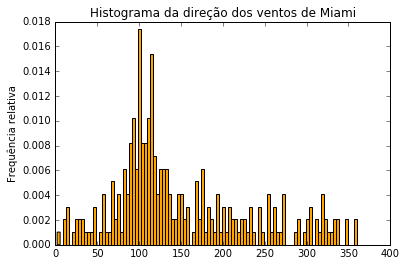

In [33]:
#Histograma da direção dos ventos em Miami

hist = plt.hist(direcao, normed=True, bins=100, color="orange")
plt.title("Histograma da direção dos ventos de Miami")
plt.ylabel("Frequência relativa")
hist
direcao.describe()

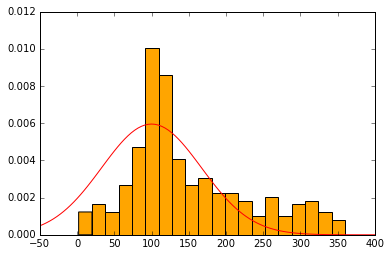

In [18]:
#Histograma com a distribuição teorica (normal) e parametros estimados

x = np.linspace(-50, 400, 100)
y = norm.pdf(x, loc=100, scale=67)
hist = plt.hist(direcao, normed=True, bins=20, color="orange")


plt.plot(x,y, color="r")
plt.show()

In [48]:
#TENTATIVA DE FAZER WEIBULL

c = 1.75
mean, var, skew, kurt = weibull_max.stats(c, moments="mvks")
x = np.linspace(weibull_max.ppf(0.167, c), weibull_max.ppf(0.167, c), 360)
r = weibull_max.rvs(c, size=1000)
#ax.hist(hist, normed=True)
plt.show()

In [10]:
#Media da direção dos ventos em Miami
direcao.mean()

149.04395604395606

In [11]:
#Variancia da direção dos ventos em Miami
direcao.std()

81.91085255718636

In [20]:
#Fit com normal

direc_fit = stats.norm.fit(direcao)
direc_fit

(149.04395604395606, 81.760695047677942)

In [19]:
#Fit com Weibull

direct_weibull = stats.weibull_max.fit(direcao)
direct_weibull

(0.16797055875545414, 360.00000000000006, 1.7564760500380969)

count    273.000000
mean      24.465934
std        3.737623
min       10.700000
25%       22.900000
50%       25.600000
75%       27.300000
max       29.200000
Name: Media diaria de Temperatura (ºC), dtype: float64

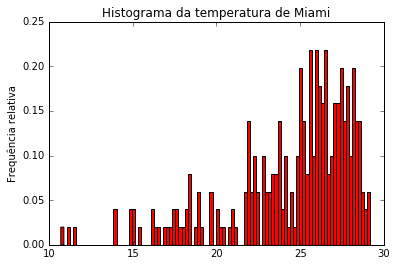

In [50]:
#Histograma da temperetura

hist = plt.hist(temp, normed=True, bins=100, color="r")
plt.title("Histograma da temperatura de Miami")
plt.ylabel("Frequência relativa")
hist
temp.describe()

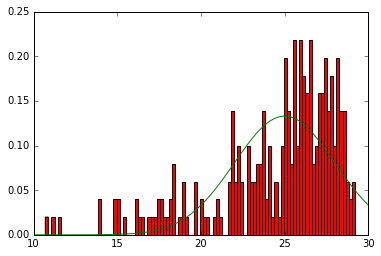

In [47]:
#TENTATIVA DE FAZER A NORMAL NO HISTOGRAMA DE TEMPERATURA

x = np.linspace(10, 30, 100)
y = norm.pdf(x, loc=25, scale=3)
hist = plt.hist(temp, normed=True, bins=100, color="red")


plt.plot(x,y, color="green")
wplt.show()

In [42]:
#fit de temperatura 

direc_fit = stats.norm.fit(temp)
direc_fit

(24.465934065934064, 3.730771550491006)

___
### Itens 3 a 6 - Resolução:

___
### Itens 7 a 9 - Resolução:

___
### Itens 10 e 11 - Resolução: